<a href="https://colab.research.google.com/github/Sifatkhan-1915020/deeplearning-/blob/main/Max%20Pooling%20from%20scratch%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

In [14]:
conv_output = np.array([
    [10,11,8,7],
    [12,13,10,9],
    [1,4,11,19],
    [11,17,18,12]
])

In [15]:
pool_size=2
stride =1

for i in np.arange(conv_output.shape[0],step=stride):
  for j in np.arange(conv_output.shape[0],step=stride):

    mat =conv_output[i:i+pool_size,j:j+pool_size]

    if mat.shape == (pool_size,pool_size):
     print (mat)

  print()

[[10 11]
 [12 13]]
[[11  8]
 [13 10]]
[[ 8  7]
 [10  9]]

[[12 13]
 [ 1  4]]
[[13 10]
 [ 4 11]]
[[10  9]
 [11 19]]

[[ 1  4]
 [11 17]]
[[ 4 11]
 [17 18]]
[[11 19]
 [18 12]]




In [20]:
def get_pools(img:np.array,pool_size:int,stride:int) -> np.array:
  pools=[]

  for i in np.arange(img.shape[0],step=stride):
    for j in np.arange(img.shape[0],step=stride):

      mat = img[i:i+pool_size,j:j+pool_size]

      if mat.shape == (pool_size,pool_size):
        pools.append(mat)

  return np.array(pools)

In [30]:
test_pools=get_pools(img=conv_output,pool_size=2,stride=2)

In [31]:
test_pools

array([[[10, 11],
        [12, 13]],

       [[ 8,  7],
        [10,  9]],

       [[ 1,  4],
        [11, 17]],

       [[11, 19],
        [18, 12]]])

In [39]:
def max_pooling(pools:np.array) -> np.array:
  num_pools= pools.shape[0]
  tgt_shape = (int(np.sqrt(num_pools)),int(np.sqrt(num_pools)))
  pooled =[]

  for pool in pools:
    pooled.append(np.mean(pool))

  return np.array(pooled).reshape(tgt_shape)


In [40]:
 pooling_res=max_pooling(pools=test_pools)

In [41]:
pooling_res

array([[11.5 ,  8.5 ],
       [ 8.25, 15.  ]])

In [43]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt


In [44]:
def plot_image(img:np.array):
  plt.figure(figsize=(6,6))
  plt.imshow(img,cmap='gray')

In [45]:
def plot_two_images(img1:np.array, img2=np.array):
  _,ax=plt.subplots(1,2,figsize=(12,6))
  ax[0].imshow(img1,cmap='gray')
  ax[1].imshow(img2,cmap='gray')


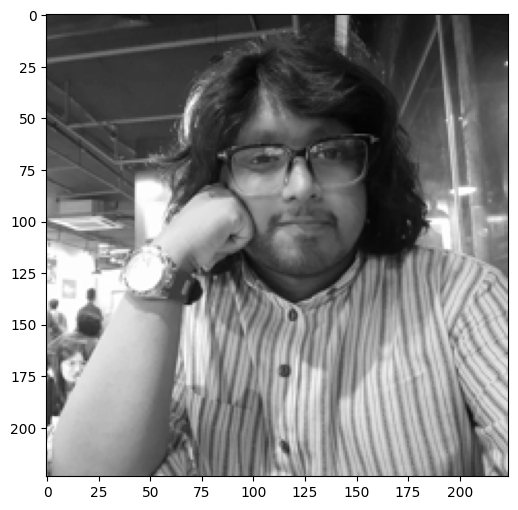

In [46]:
img = Image.open('ni.jpg')
img = ImageOps.grayscale(img)
img =img.resize(size=(224,224))
plot_image(img=img)

In [47]:
image_pools = get_pools(img=np.array(img),pool_size=2,stride=2)
image_pools

array([[[ 68,  67],
        [ 67,  65]],

       [[ 64,  62],
        [ 64,  62]],

       [[ 64,  65],
        [ 61,  62]],

       ...,

       [[127,  96],
        [171, 117]],

       [[106, 137],
        [ 90, 115]],

       [[145, 148],
        [145, 135]]], dtype=uint8)

In [53]:
image_pools.shape

(12544, 2, 2)

In [52]:
np.sqrt(image_pools.shape[0])

112.0

In [54]:
image_max_pool =max_pooling(pools=image_pools)
image_max_pool

array([[ 66.75,  63.  ,  63.  , ...,  38.75,  40.  ,  39.  ],
       [ 63.5 ,  62.75,  61.  , ...,  38.5 ,  40.  ,  39.  ],
       [ 61.  ,  61.5 ,  61.75, ...,  41.5 ,  40.  ,  40.5 ],
       ...,
       [144.25, 164.25, 176.75, ..., 171.25, 167.5 , 205.75],
       [131.75, 148.75, 171.25, ..., 101.25, 154.75, 176.75],
       [109.  , 140.5 , 166.25, ..., 127.75, 112.  , 143.25]])

In [55]:
image_max_pool.shape

(112, 112)

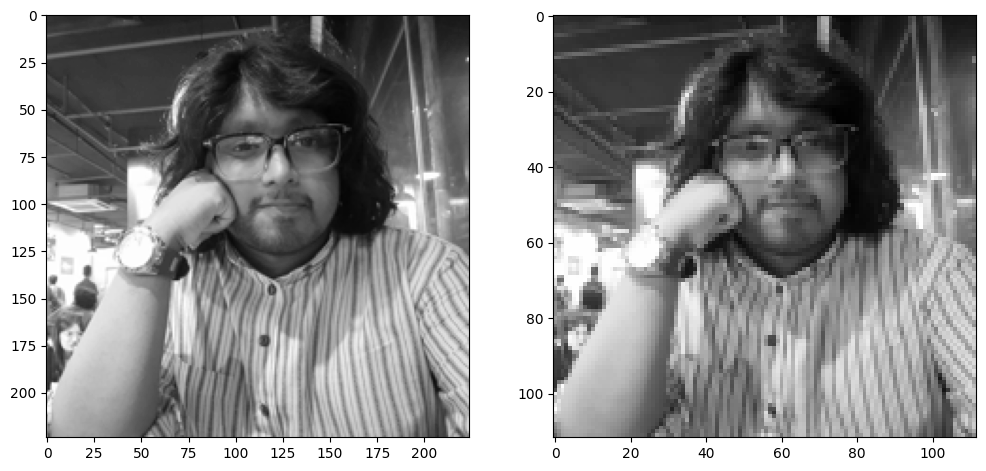

In [56]:
plot_two_images(img1=img ,img2=image_max_pool)

In [ ]:
np.sqrt(112)